In [2]:

import scgenome

import logging

LOGGING_FORMAT = "%(asctime)s - %(levelname)s - %(message)s"
logging.basicConfig(level=logging.INFO)


In [3]:

hmmcopy = scgenome.pp.read_dlp_hmmcopy(
    '/juno/work/shah/isabl_data_lake/analyses/85/03/8503',
    '/juno/work/shah/isabl_data_lake/analyses/86/78/8678',
    '/juno/work/shah/isabl_data_lake/analyses/88/15/8815',
)


/juno/work/shah/users/mcphera1/repos/scgenome/venv/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


<AxesSubplot:>

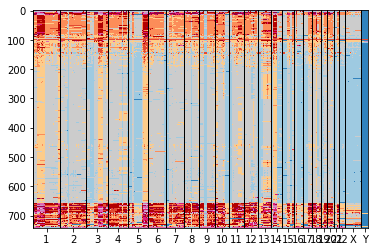

In [6]:

import numpy as np
import matplotlib.pyplot as plt

import scgenome.preprocessing.transform
import scgenome.tools.sorting
import scgenome.plotting.heatmap

hmmcopy = scgenome.preprocessing.transform.fill_missing(hmmcopy, layer_name='copy')
hmmcopy = scgenome.tools.sorting.sort_cells(hmmcopy, layer_name='copy')
scgenome.plotting.heatmap.plot_cell_cn_matrix(
    hmmcopy, layer_name='state', cell_order_fields=['cell_order'], raw=False)


In [7]:

import scgenome.tools.sorting

hmmcopy = scgenome.tools.cluster.cluster_cells_kmeans(hmmcopy, max_k=30)


INFO:root:trying with k=2


trying with max k=30


INFO:root:trying with k=3
INFO:root:trying with k=4
INFO:root:trying with k=5
INFO:root:trying with k=6
INFO:root:trying with k=7
INFO:root:trying with k=8
INFO:root:trying with k=9
INFO:root:trying with k=10
INFO:root:trying with k=11
INFO:root:trying with k=12
INFO:root:trying with k=13
INFO:root:trying with k=14
INFO:root:trying with k=15
INFO:root:trying with k=16
INFO:root:trying with k=17
INFO:root:trying with k=18
INFO:root:trying with k=19
INFO:root:trying with k=20
INFO:root:trying with k=21
INFO:root:trying with k=22
INFO:root:trying with k=23
INFO:root:trying with k=24
INFO:root:trying with k=25
INFO:root:trying with k=26
INFO:root:trying with k=27
INFO:root:trying with k=28
INFO:root:trying with k=29
INFO:root:trying with k=30
INFO:root:selected k=28


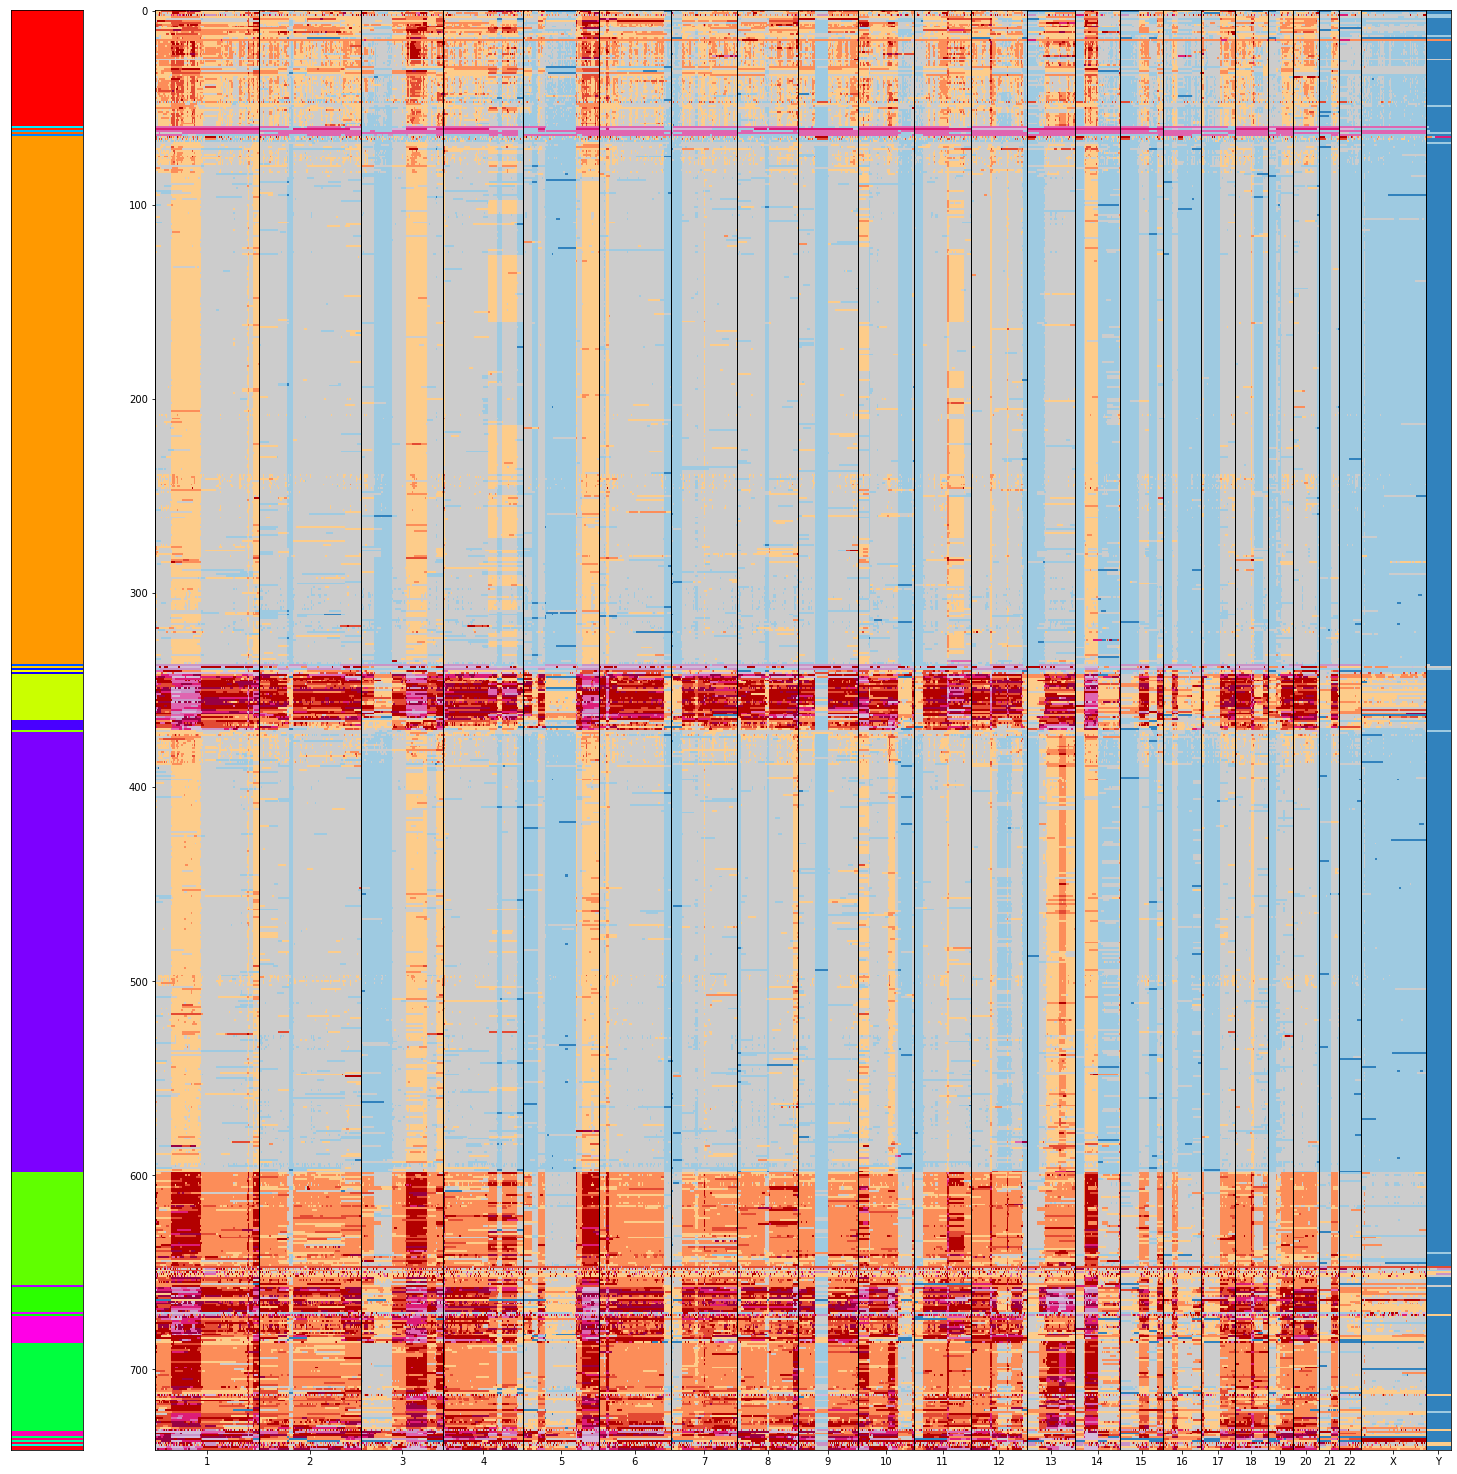

In [8]:

fig = plt.figure(figsize=(20, 20))
fig = scgenome.plotting.heatmap.plot_cell_cn_matrix_clusters_fig(hmmcopy, fig=fig)


In [9]:

import scgenome.preprocessing.filtering

hmmcopy = scgenome.preprocessing.filtering.calculate_filter_metrics(hmmcopy)


/juno/work/shah/users/mcphera1/repos/scgenome/venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/juno/work/shah/users/mcphera1/repos/scgenome/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [10]:

hmmcopy = scgenome.preprocessing.filtering.filter_cells(hmmcopy)


<AxesSubplot:xlabel='chromosome'>

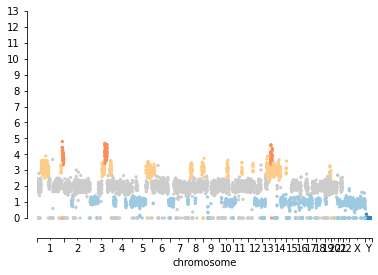

In [31]:

import scgenome.plotting.cn

scgenome.plotting.cn.plot_cn_profile(
    hmmcopy, 'SA1090-A96213A-R22-C50',
    value_layer_name='copy',
    state_layer_name='state')

# TODO: fix the issues with poor quality bins being filled with 0 copy


In [4]:

cell_bams = {
    'SA1090-A96213A-R20-C06': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C06.bam',
    'SA1090-A96213A-R20-C08': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C08.bam',
    'SA1090-A96213A-R20-C09': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C09.bam',
    'SA1090-A96213A-R20-C10': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C10.bam',
    'SA1090-A96213A-R20-C11': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C11.bam',
    'SA1090-A96213A-R20-C12': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C12.bam',
    'SA1090-A96213A-R20-C13': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C13.bam',
    'SA1090-A96213A-R20-C14': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C14.bam',
}


In [14]:

import bamread
import pyranges

for cell_id, cell_bam in cell_bams.items():
    bam_data = pyranges.read_bam(cell_bam, mapq=0, required_flag=0, filter_flag=1540)
    break


In [18]:

bam_data


,Chromosome,Start,End,Strand,Flag
0,1,359298,359445,+,129
1,1,564483,564580,+,99
2,1,569272,569379,+,99
3,1,1348769,1348916,+,163
4,1,1656435,1656454,+,163
...,...,...,...,...,...
9564,Y,14100015,14100034,-,83
9565,Y,21567921,21567941,-,147
9566,Y,23426100,23426121,-,83
9567,Y,27564905,27564925,-,83


In [38]:

import pyranges as pr

chromsizes = pr.data.chromsizes()

def modify_chrom_series(df):
    df.Chromosome = df.Chromosome.apply(lambda val: val.replace("chr", ""))

chromsizes.apply(modify_chrom_series)

pr.gf.tile_genome(chromsizes, int(1e6))


AttributeError: ('PyRanges object has no attribute', 'End')

In [49]:

dir(db)


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'cpg',
 'ensembl',
 'exons',
 'gencode',
 'get_ftp_file',
 'gwas_catalog',
 'methods',
 'pr',
 'ucsc']

In [57]:

import pyranges_db as db

hg19 = db.ensembl.chromosome_sizes('homo_sapiens')
hg19

# db.ensembl.genomes()['Genome'].unique()


KeyboardInterrupt: 

In [45]:



genome = chromsizes
tile_size = 1000000
tile_last = False


def _last_tile(df, **kwargs):
    # do not need copy, since it is only used internally by
    # tile_genome
    # df = df.copy()
    print(df)
    sizes = kwargs.get("sizes")
    print(sizes)
    print(df.Chromosome.iloc[0])
    print(sizes[df.Chromosome.iloc[0]])
    print(sizes.keys())
    size = sizes[df.Chromosome.iloc[0]].End.iloc[0]
    df.loc[df.tail(1).index, "End"] = size

    return df

if isinstance(genome, dict):
    chromosomes, ends = list(genome.keys()), list(genome.values())
    df = pd.DataFrame({"Chromosome": chromosomes, "Start": 0, "End": ends})
    genome = pr.PyRanges(df)

gr = genome.tile(tile_size)

if not tile_last:
    gr = gr.apply(_last_tile, sizes=genome)



    Chromosome      Start        End
0            1          0    1000000
1            1    1000000    2000000
2            1    2000000    3000000
3            1    3000000    4000000
4            1    4000000    5000000
..         ...        ...        ...
245          1  245000000  246000000
246          1  246000000  247000000
247          1  247000000  248000000
248          1  248000000  249000000
249          1  249000000  250000000

[250 rows x 3 columns]
+--------------+-----------+-----------+
| Chromosome   | Start     | End       |
| (category)   | (int32)   | (int32)   |
|--------------+-----------+-----------|
| 1            | 0         | 249250621 |
| 2            | 0         | 243199373 |
| 3            | 0         | 198022430 |
| 4            | 0         | 191154276 |
| ...          | ...       | ...       |
| 22           | 0         | 51304566  |
| M            | 0         | 16571     |
| X            | 0         | 155270560 |
| Y            | 0         | 59373566  |

AttributeError: ('PyRanges object has no attribute', 'End')

In [22]:
pr.data??

In [45]:

# TODO: clone profiles

agg_layers = {
    'copy': np.nanmean,
    'state': np.nanmedian,
}

agg_X = np.sum

for layer_name in hmmcopy.layers:
    layer_data = (
        hmmcopy
            .to_df(layer=layer_name)
            .set_index(hmmcopy.obs['cluster_id'], append=True)
            .groupby(level=1)
            .agg(np.nanmean))
